# Setup

In [1]:
from IPython.display import clear_output

!gdown --id 1ljXF1nfRcql6G250c5bKPHQzkveEvuTL
!unzip /content/archive.zip
!rm /content/archive.zip

clear_output()

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
penguin = pd.read_csv('/content/penguins_lter.csv')

penguin.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
print(penguin.columns, end='\n\n')

for column in penguin.columns:
    print(f"{column}: {penguin[column].isna().sum()}")

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

studyName: 0
Sample Number: 0
Species: 0
Region: 0
Island: 0
Stage: 0
Individual ID: 0
Clutch Completion: 0
Date Egg: 0
Culmen Length (mm): 2
Culmen Depth (mm): 2
Flipper Length (mm): 2
Body Mass (g): 2
Sex: 10
Delta 15 N (o/oo): 14
Delta 13 C (o/oo): 13
Comments: 318


In [5]:
col_drop = penguin[['studyName', 'Sample Number','Stage',
                    'Individual ID', 'Clutch Completion', 'Date Egg', 
                    'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments','Region']]
penguin.drop(col_drop, axis=1, inplace=True)

mean_CL = penguin['Culmen Length (mm)'].mean()
penguin['Culmen Length (mm)'].fillna(value=mean_CL, inplace=True)

mean_CL = penguin['Culmen Depth (mm)'].mean()
penguin['Culmen Depth (mm)'].fillna(value=mean_CL, inplace=True)

mean_CL = penguin['Flipper Length (mm)'].mean()
penguin['Flipper Length (mm)'].fillna(value=mean_CL, inplace=True)

mean_CL = penguin['Body Mass (g)'].mean()
penguin['Body Mass (g)'].fillna(value=mean_CL, inplace=True)

penguin['Sex'] = penguin['Sex'].fillna("MALE")
penguin['Sex'] = penguin['Sex'].replace(to_replace =".", value ="MALE")

penguin.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [6]:
dummies = pd.get_dummies(penguin.Sex)
merge = pd.concat([penguin, dummies], axis='columns')
penguin_data = merge.drop(['Sex'], axis='columns')

dummies = pd.get_dummies(penguin_data.Island)
merge = pd.concat([penguin_data, dummies], axis='columns')
penguin_data = merge.drop(['Island'], axis='columns')

LE = preprocessing.LabelEncoder()
LE.fit(penguin_data['Species'])
penguin_data['Species'] = LE.transform(penguin_data['Species'])

In [7]:
penguin_data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),FEMALE,MALE,Biscoe,Dream,Torgersen
0,0,39.10000,18.70000,181.000000,3750.000000,0,1,0,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,1,0,0,0,1
2,0,40.30000,18.00000,195.000000,3250.000000,1,0,0,0,1
3,0,43.92193,17.15117,200.915205,4201.754386,0,1,0,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,1,0,0,0,1


In [8]:
X = penguin_data[['Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'FEMALE', 'MALE', 'Biscoe',
       'Dream']]

Y = penguin_data['Species']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=420)

---

# Welcome!

Welcome to the second session of Techsoc Roadmaps, organized by Analytics Club!

## Today's Content

- Machine Learning
    - Linear Regression
    - Logistic Regression
    - Decision Trees
- Evaluation Metrics
    - Why use metrics?
    - Binary Classification
    - Popular Metrics
    - Threshold based Metrics- Confusion Matrix, Accuracy, Precision, Recall(aka Sensitivity), Specificity, F-measure.
    - Ranking based metrics- ROC AUC, PRC AUC
    - Probability based metrics - log-loss, brier score.
    - Class Imbalance case
    - How to choose?
    - Multi Class Classification
    - Feature Importance


---

# Introduction

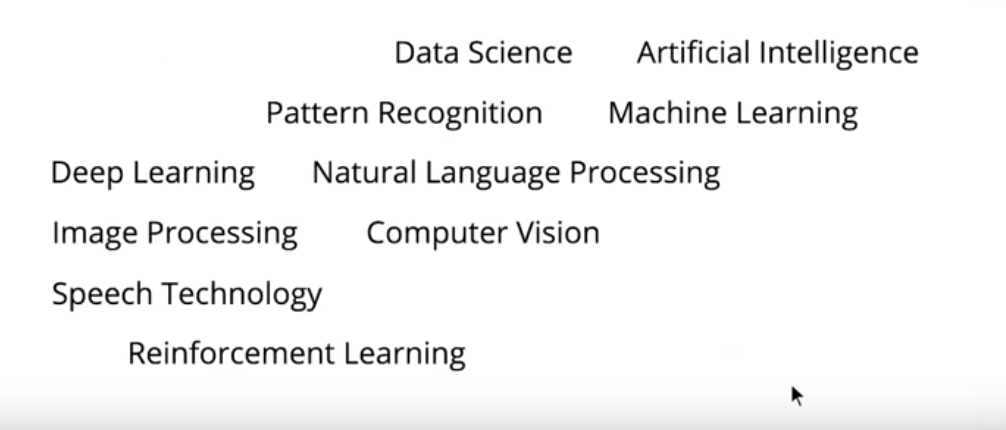

I am certain that all of you here would have come across these words and want to work on some of these things.

## Some Definitions

Lets start by having a look at some definitions of these words present on the internet.

- **Artificial Intelligence** (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and animals. [Source](https://en.wikipedia.org/wiki/Artificial_intelligence)

- **Machine Learning** (ML) is the scientific study of algorithms and statistical models that computer systems use to perform a specific task without using explicit instructions, relying on patterns and inference instead. [Source](https://en.wikipedia.org/wiki/Machine_learning)

- **Data Science** is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining and big data. [Source](https://en.wikipedia.org/wiki/Data_science)

There are some new words popping here like inter disciplinary, using structured and unstructed data, etc., but lets not worry about them right away, as these definitions don't exactly highlight the key differences between these words.

Lets start by understanding some abilites that humans have: ability to see, hear and listen, read and write, make decisions. Now what do these translate to for machines? Computer Vision, Natural Language Processing, Planning and Decision Making. 

Now these are some of the abilities we would expect from an Aritificial Intelligence System. Like in case of Computer Vision, it is used for detecting objects, classifying them etc. Some NLP tasks include converting voice to text or text to voice etc.

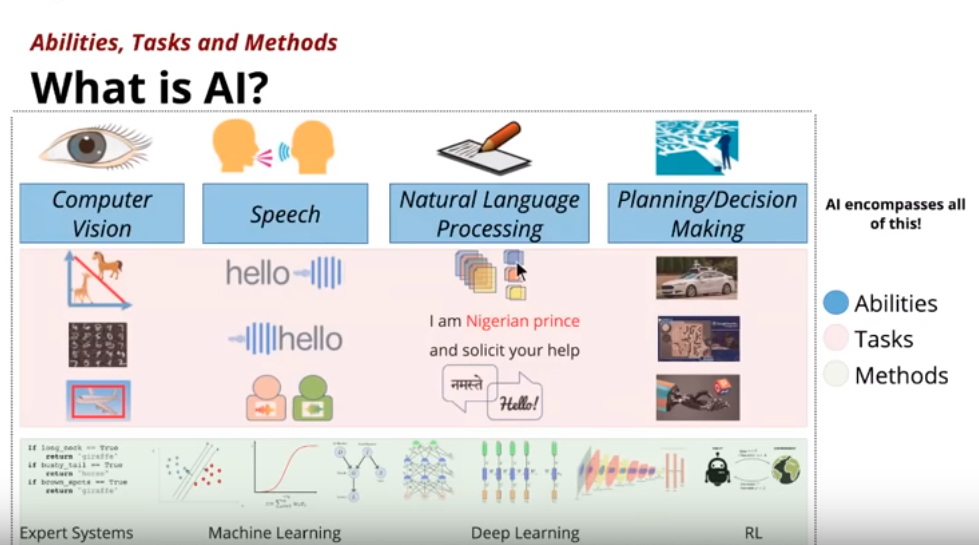

There are the different methods to solve these tasks. The most primitive one is expert systems. An expert system is basically a rule based model, where we explicitely define some rules for the model to perform these tasks. Now defining all these tasks is very hard. Thats when Machine Learning comes into play where we give the machine some labelled data and hence allow the model to learn some correlation between the inputs and outputs. Since the last few years the hype has been revolving around a subset of Machine Learning algorithms called Deep learning. Further on there are methods like Reinforcement Learning, which utilise Deep Learning technicques to make an agent which can perform decision making.

<center> AI encompasses all of these techinques. </center>

Artificial Intelligence means getting a computer to mimic human behaviour in some way. Artificial Intelligence is a broader concept while Machine Learning is a very common application of AI.

### Rule Based vs Learning Based

In an explicitely programmed system, we give the model certain rules while in the case of the machine is given data and their corresponding labels.

For example: Lets say $\mathrm{F}$ was a linear function $y = mx + c$, then the task of the Machine Learning model is to identify the best set of parameters $m$ and $c$ to map the input to the corresponding output.



---

# Machine Learning

A computer program is said to learn from experience $\mathrm{E}$ with respect to some task $\mathrm{T}$ and some performance measure $\mathrm{P}$, if its performance on $\mathrm{T}$, as measured by $\mathrm{P}$, improves with experience $\mathrm{E}$.

WOAH! sounds complex? Well, actually not! If there is a computer algorithm which can perform a task $\mathrm{T}$ after learning from some existing data $\mathrm{E}$ (basically experience), and if its performance $\mathrm{P}$ improves with more data (more experience) we call it a Machine learning algorithm.

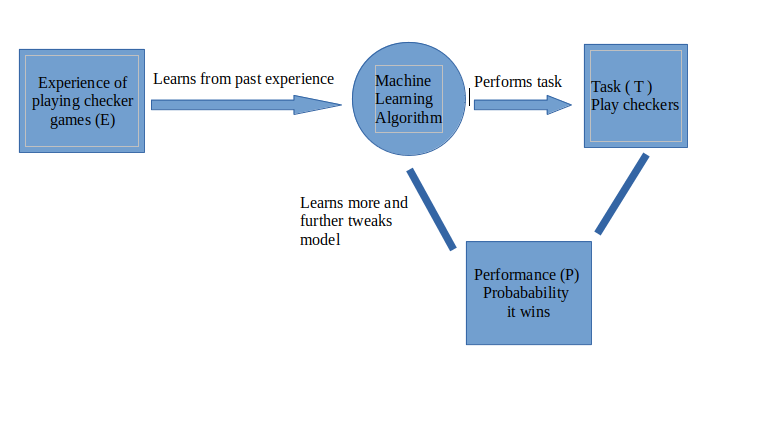

Suppose we have to teach a computer to play a checkers game. Then the task $\mathrm{T}$ is to play a checkers game. Now to train the model we should have data of previous checkers games which is going to act as our experience $\mathrm{E}$ from which the algorithm learns. Now to evaluate how well the computer plays we keep a performance metric $\mathrm{P}$ which in this case, I define as the probability that the computer wins the game. The computer can learn from the game it has played and further tweak the model to perform better. The process of learning happens over multiple iterations and with each iteration, the model should perform better.

## Supervised Learning vs Unsupervised Learning

### Supervised Learning

In Supervised Learning, we train a model with data which is already labelled or in simpler words we have a dataset which contains information about what the actual output must look like. So once the model learns from this “Training data” it tries to predict the output for a new set of examples by establishing a relationship between the input and output. 

For example: Given images with information of what’s on them, we need to recognise new images. 

Supervised Learning problems can be further classified into two main categories:

##### Regression Problem

Whenever we are trying to predict results within a continuous output, meaning we are trying to map some input variables to some continuous function. For example: Given the characteristics of a mobile phone, we need to predict the approximate price of the mobile phone. 
<br> [Demonstration](https://raw.githubusercontent.com/analytics-club-iitm/weekly-sessions/master/6/images/reg.gif)

##### Classification Problem

Whenever we are trying to classify the output into specific categories, meaning we need to map some input variables to output some discrete values. For example: Given an image of an animal, we need to classify into whether its a cat or a dog.
<br> [Demonstration](https://raw.githubusercontent.com/analytics-club-iitm/weekly-sessions/master/6/images/class.gif)

### Unsupervised Learning

Unsupervised learning is the training of machine using information that is neither classified nor labelled and allowing the algorithm to act on that information without guidance. Here the task of machine is to group unsorted information according to similarities, patterns and differences without any prior training of data.

For example, A computer doesn’t know what the game cricket is and hence the computer can group the players based on some common characteristics like batting style (Right-Handed or Left-Handed), based on whether they are wearing similar kits, etc.

Unsupervised learning can be classified into two categories of algorithms:

##### Clustering

A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behaviour.
<br> [Demonstration](https://raw.githubusercontent.com/analytics-club-iitm/weekly-sessions/master/6/images/cluster.gif)

##### Association

An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy $X$ also tend to buy $Y$.

---

# Linear Regression

A linear regression model tries to map the output variable with the input variable in a linear fashion. In other words, a linear regression model assumes a linear relationship between a dependent, continuous variable $Y$ with one or more independent variables called $X$.

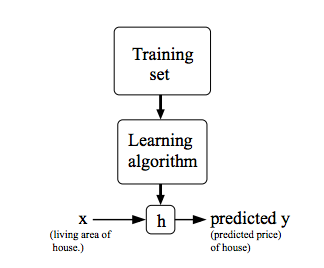

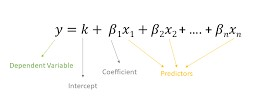

Considering the standard form for a line.

$Y$ (Price) $=$ $M * X$ (living Area) $+ C$

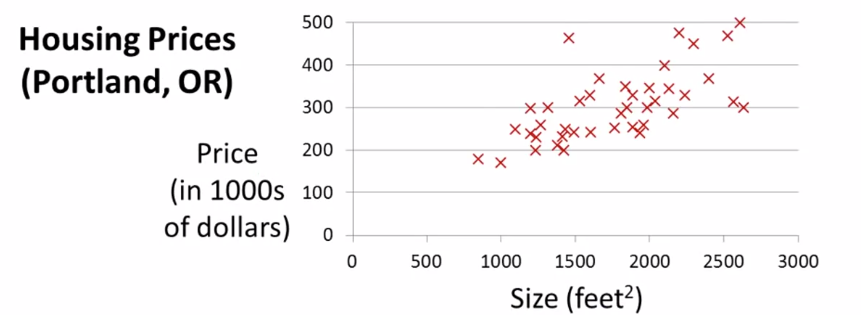

On plotting price along y-axis and size (in ft²) along $x$, we see the above plot. So the objective in a linear regression model is to fit a straight line onto this given data and try to predict the price of the house given another size.

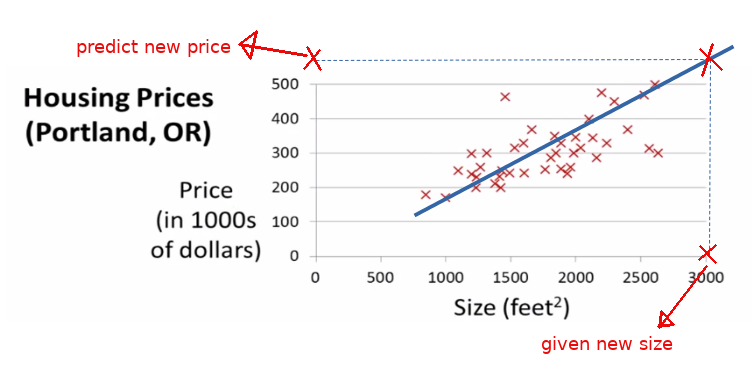

The challenging part to do this is to find the straight line that best fits the given data. As we already know every line is defined by two parameters its slope $m$ and the constant $c$. So to uniquely define a line which best fits the given data we need to find the optimal value of $m$ and $c$.

As we can see from the above plot the “best fit” line need to always pass through every point given in the data and must rather be such that the deviation from these points must be minimal.

## Cost Function (Loss)

As mentioned above we need to have a metric that evalautes how well the model fits to the given data. This metric is modelled into a function which we call the cost function. So cost function defines how much the line is deviating from the true values. We need to find the parameters of the line (i.e) $m$ and $c$ such that the cost is minimum.

This cost function is modelled as per the user's desire based on the given problem. Since we are modelling a regression problem the simplest way to define the cost function is the mean squared error.

Mean Squared Error = $\frac{\left( y_{pred} - y_{actual} \right)^2 }{2N}$, where $N$ is the total number of points we are trying to fit a line to. $y_{pred}$ is the predicted values outputed from the model and $y_{actual}$ is the true value or ground truth.



Let us define the model as $ h_{\theta} \left( x \right) = \theta_0 + \theta_1 x $, where $ h_{\theta} \left( x \right) → y$ is the model and $\theta$ are the parameters.

Therefore the cost function is defined as
$$ \mathrm{J} \left( \theta \right) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_{\theta} \left( x_i \right) - y \right)^2 $$

NOTE:

Often we represent the $ h_{\theta} \left( x \right) = \theta_0 + \theta_1 x $ in a matrix form to include all the $N$ data values as 
$$ Y = \theta_0 + X \theta_1  $$ 
or (sometimes)
$$ Y = \theta_0 + \theta_1^T X  $$ 
Where,
- $Y$ reperesents the target and $Y$ is a vector (row matrix) of dimensions  $N \times L$ (here $ L=1 $)
- $X$ represents the input and $X$ is a matrix (whose rows represents the $N$ data values and columns represent different features) of dimensions $N \times M$ (here $ M=1 $) 
- $\theta_1$ is the Weight Matrix and is of dimensions $M \times L$ (here $M=1$, $L=1$) or $L \times M$
- $\theta_0$ is the Bias Vector and is dimensions $N \times 1$


## How to find the Optimal Parameters of the line?

We have now defined the cost function and hence for every value of $\theta$ , we know the cost/the deviation between the predicted and actual values. Plotting the cost at corresponding values of $\theta_1$ and $\theta_0$ we get the following graph.

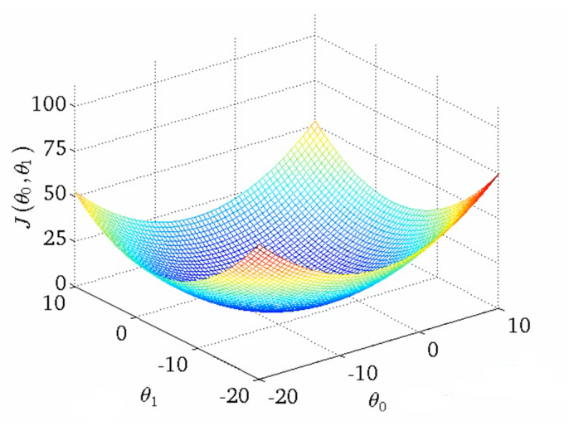

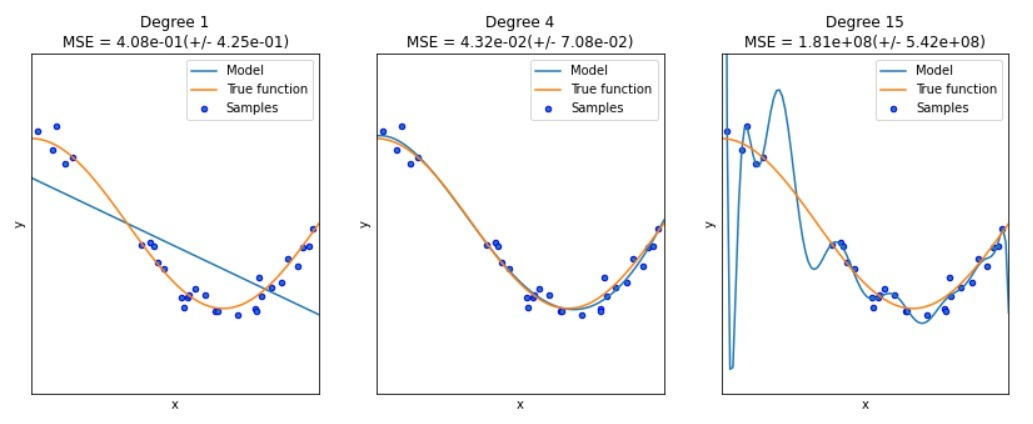

To find the optimal values of $\theta$, the cost is minimum at the minima of the above function. We can’t do this in one iteration i.e we can’t find the optimal value of $\theta$ in one step. Instead its a learning process over multiple iterations which finetunes the parameters for minimum cost.
<br> [Demonstration](https://raw.githubusercontent.com/analytics-club-iitm/weekly-sessions/master/7/data/4.gif)

### Matrix Inversion

The straight forward method to find optimal values of $\theta$ is to solve for $\theta$ directly. 

Suppose consider the Linear Regression case for example: 
$$ Y = \theta_0 + X \theta_1 $$
Where we are trying to find the optimal values of $\theta$.

The naive way would be to just directly solve for $\theta$ but immediately you would encounter the probelem that you have one equation (although consists of $N$ different cases) and 2 variables $\theta_0$ and $\theta_1$ (both of which are matrices).

Therefore we assume without loss of generality $\theta_0$ to be a zero vector (or you could set all its elements equal to mean of $Y$) and proceed to compute $\theta_1$ as
$$ \theta_1 = X^{-1} \left( Y - \theta_0 \right) $$
and voila!

Limitations:
- Expensive computation (matrices can be very huge and hence inverse computation is very expensive, both time and space)
- Overfits the dataset

### Gradient Descent

The method of finding the optimal values of $\theta$ is termed as Gradient Descent. Now lets try to understand this intuitively.

Imagine a valley where a person at the top has to reach the bottom of it and the person has no clue as to which direction the minima is.

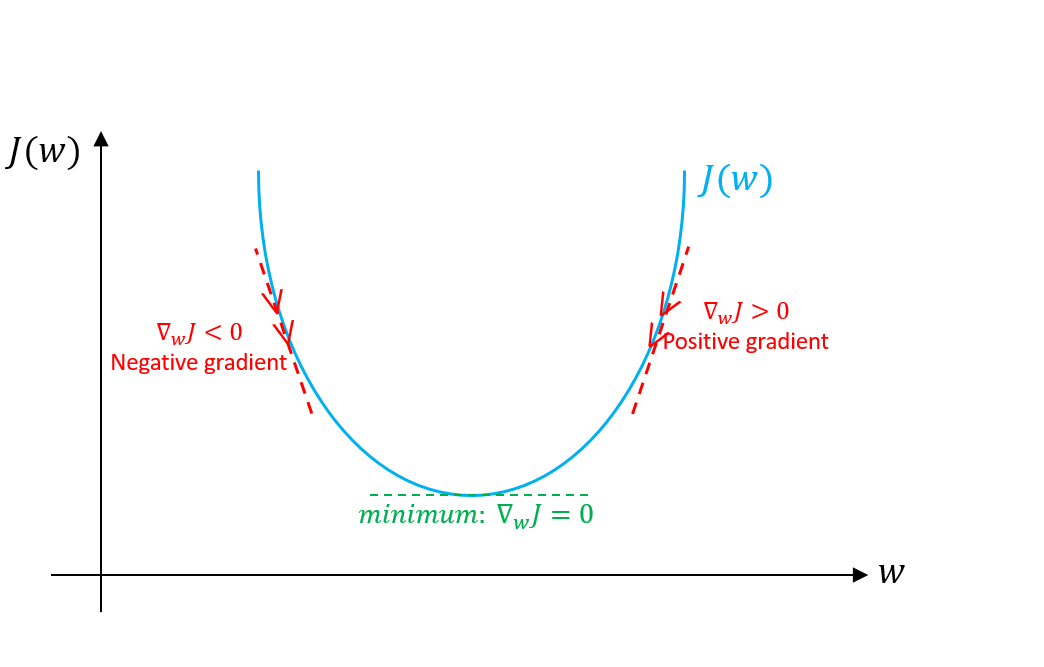

When the person is on the left of the minima, the slope at the point at which he is standing is negative. 
- Now suppose we subtract this negative value from the value of $\theta$ at that particular point we can see that $\theta$ would increase (subtracting a negative value basically adds it) and hence the person would move closer to the minima (i.e) to the right. 
- Similarly, if the person is on the right of the minima the slope at that point is positive and hence by subtracting this positive value from $\theta$, the person would move towards the minima (i.e) to the left.

Performing this multiple times will help us reach the bottom of this valley and in case of Linear Regression the bottom of the cost function curve (cost is minimum). The corresponding values of $\theta$ at this point is the optimal value of $\theta$.
<br> [Demonstration](https://raw.githubusercontent.com/analytics-club-iitm/weekly-sessions/master/7/data/6.gif)

As the person moves closer and closer to the minima the slope would decrease and the person would take smaller and smaller steps. Hence the person can’t reach the exact minima but go as close as possible to it. 

The aim of a Linear Regression model should be to reduce the cost as much as possible but since it can never reach the absolute minima, we can stop training once the cost is saturated. (i.e the model can’t improve further).

Repeat until convergence {  
    $$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} \mathrm{J} \left( \theta \right) $$
}

If you are interested, learn more about Gradient Descent [here](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) and about Optimizers [here](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6?gi=cdd403a2c801). We will be moving on.

# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model
a binary dependent variable, although many more complex extensions exist. Mathematically, a
binary logistic model has a dependent variable with two possible values, such as pass/fail which
is represented by an indicator variable, where the two values are labelled "0" and "1". 

Logistic Regression is used when the dependent variable (target) is categorical. For example, to predict
- Whether an email is spam (1) or (0)
- Whether the tumour is malignant (1) or not (0)

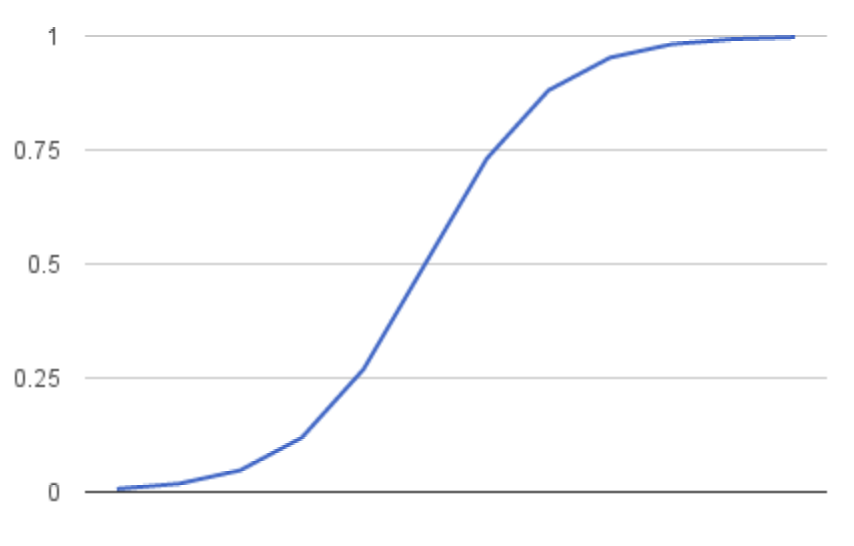

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into
a value between 0 and 1, but never exactly at those limits.

$$ \sigma \left( x \right) = \frac{1}{1+e^{-x}} $$

The model is therefore defined as, $ h_{\theta} \left( x \right) = \sigma \left( \theta_0 + \theta_1 x \right) $, where $ h_{\theta} \left( x \right) → y$ is the model and $\theta$ are the parameters.

If you are interested, learn more about Activation Functions [here](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6).

### Types of Logistic Regressors

- **Binary Logistic Regression**:
The categorical response has only two 2 possible outcomes. (Example: Spam or Not)
- **Multinomial Logistic Regression**
Three or more categories without ordering. (Example: Predicting which food is preferred more; Veg, Non-Veg, Vegan)
- **Ordinal Logistic Regression**
Three or more categories with ordering. (Example: Movie rating from 1 to 5)

### Decision Boundary

Our current prediction function returns a probability score between 0 and 1. In order to map this to a discrete class (true/false), we select a threshold value or tipping point above which
we will classify values into class 1 and below which we classify values into class 2.

- If $ p \leq 0.5 $, class = 0
- If $ p \geq 0.5 $, class = 1


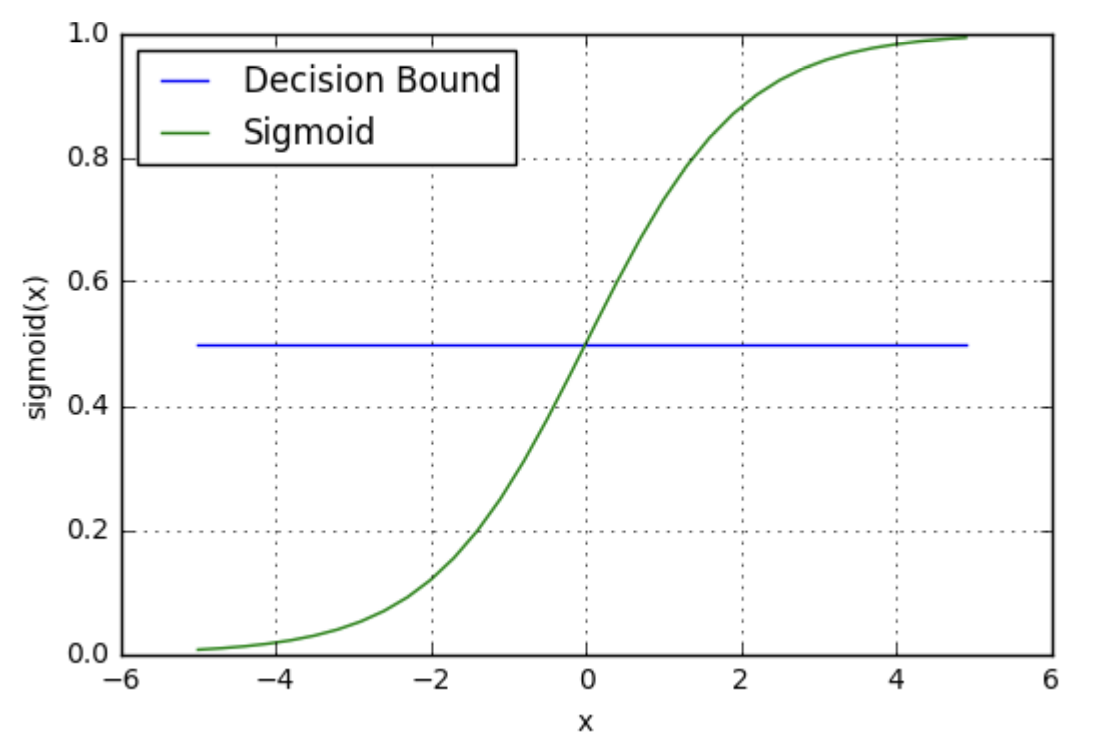

## Cost Function

You might remember the original cost function $\mathrm{J} \left( \theta \right)$ used in linear regression. It is not going to work here with logistic regression. If you try to use the linear
regression's cost function to generate $\mathrm{J} \left( \theta \right)$ in a logistic regression problem, you would end up with a non-convex function: a weirdly-shaped graph with no easy to find minimum global point, as
seen in the picture below.

This strange outcome is due to the fact that in logistic regression we have the sigmoid function around, which is non-linear (i.e. not a line). With the $\mathrm{J} \left( \theta \right)$ depicted in the figure. The gradient
descent algorithm might get stuck in a local minimum point. That's why we still need a convex function as we did for linear regression: a bowl-shaped function that eases the gradient descent function's work to converge to the optimal minimum point.

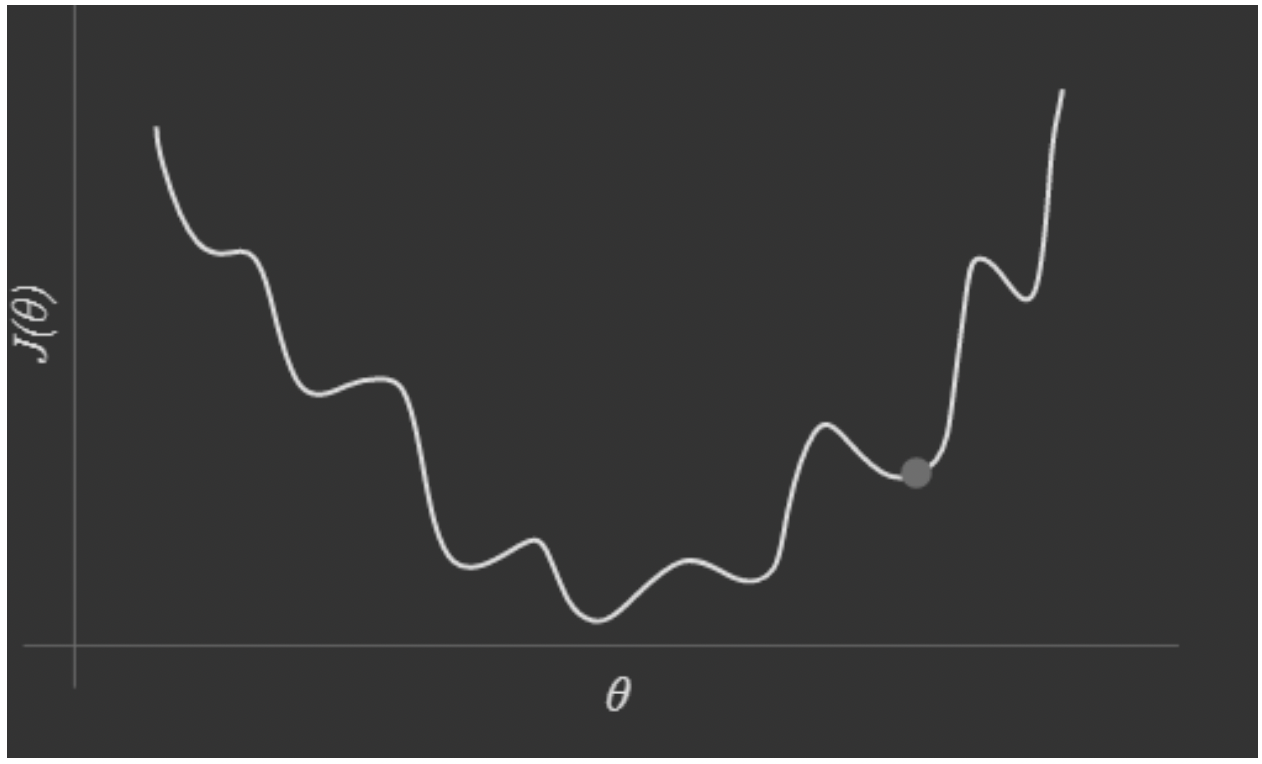

### Cost Function for Logistic Regression

Cost $ \mathrm{J} \left( \theta \right) $= 
- $ \log \left( 1 - h_{\theta} \left( x \right) \right) $ when $ y = 0 $
- $ \log \left( h_{\theta} \left( x \right) \right) $ when $ y = 1 $

Combining,
$$ \mathrm{J} \left( \theta \right) = \sum_{i=1}^{m} \left( 1 - y \right)  \log \left( 1 - h_{\theta} \left( x_i \right) \right) + y \log \left( h_{\theta} \left( x_i \right) \right) $$

When,
- For $ y = 0 $, the Cost $ \mathrm{J} \left( \theta \right) = \log \left( 1 - h_{\theta} \left( x \right) \right) $ approaches to 0 as $ h_{\theta} \left( x \right) $ approaches to 0. Conversely, the Cost to pay grows to $ \infty $ as $ h_{\theta} \left( x \right) $ approaches to 1.
- For $ y = 1 $, the Cost $ \mathrm{J} \left( \theta \right) = \log \left( h_{\theta} \left( x \right) \right) $ approaches to 0 as $ h_{\theta} \left( x \right) $ approaches to 1. Conversely, the Cost to pay grows to $ \infty $ as $ h_{\theta} \left( x \right) $ approaches to 0.

Desirable Property: we want a bigger penalty as the algorithm
predicts something far away from the actual value.


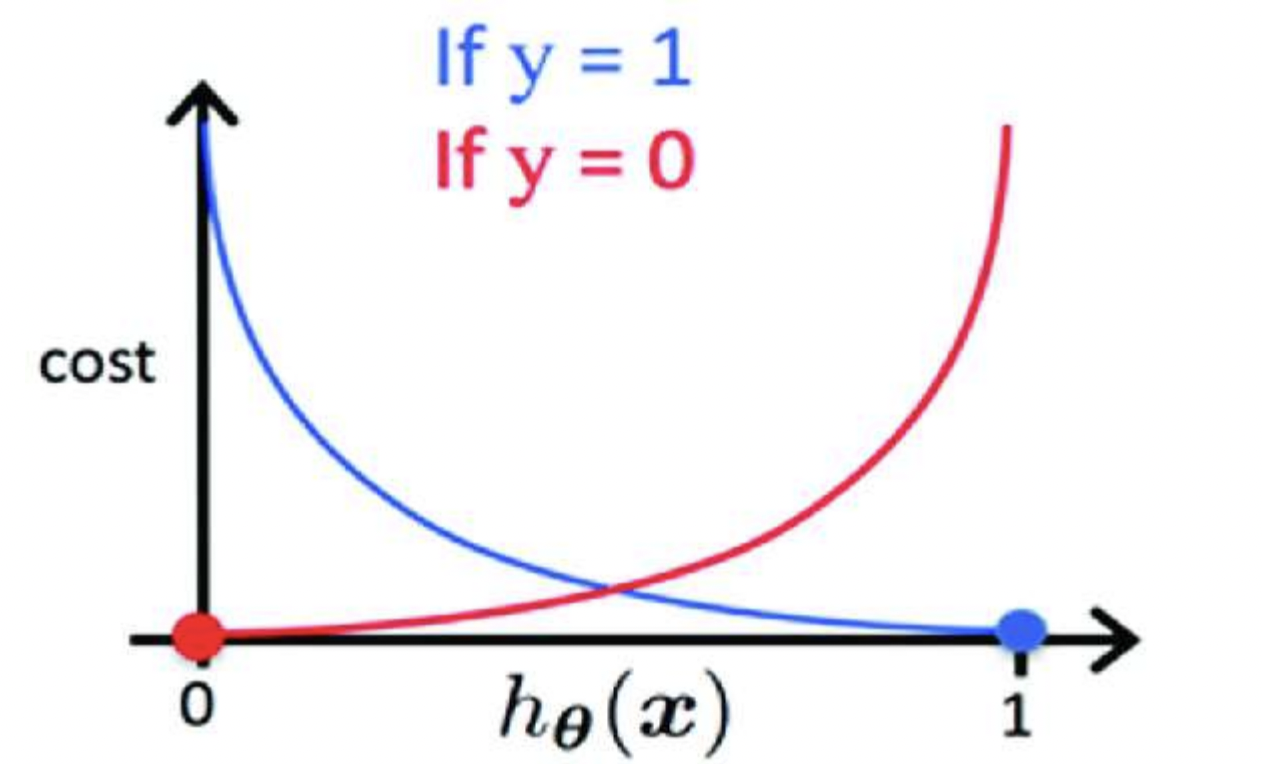

Using the Gradient Descent technique (Identical to the previous case) we find the best values for $\theta$s parameters in the cost function.


Repeat until convergence {  
    $$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} \mathrm{J} \left( \theta \right) $$
}

---

## Code

In [9]:
LRModel = LogisticRegression()

LRModel.fit(Xtrain, Ytrain)

clear_output()

In [10]:
LRpredicted = LRModel.predict(Xtest) #.astype(np.int)

print(f'Accuracy: {accuracy_score(LRpredicted, Ytest)}')

Accuracy: 0.9903846153846154


In [11]:
Ypred = {'Species': LE.inverse_transform(LRpredicted)}
Ypred = pd.DataFrame(Ypred)

predicted = pd.concat([Xtest.reset_index(), Ypred], axis=1)

predicted.head()

,index,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),FEMALE,MALE,Biscoe,Dream,Species
0,341,50.4,15.7,222.0,5750.0,0,1,1,0,Gentoo penguin (Pygoscelis papua)
1,60,35.7,16.9,185.0,3150.0,1,0,1,0,Adelie Penguin (Pygoscelis adeliae)
2,321,55.9,17.0,228.0,5600.0,0,1,1,0,Gentoo penguin (Pygoscelis papua)
3,201,49.8,17.3,198.0,3675.0,1,0,0,1,Chinstrap penguin (Pygoscelis antarctica)
4,298,45.2,13.8,215.0,4750.0,1,0,1,0,Gentoo penguin (Pygoscelis papua)


---

# Decision Trees

Your cousin has made millions of dollars speculating on real estate. He's offered to become business partners with you because of your interest in data science. He'll supply the money, and you'll supply models that predict how much various houses are worth.

You ask your cousin how he's predicted real estate values in the past. and he says it is just intuition. But more questioning reveals that he's identified price patterns from houses he has seen in the past, and he uses those patterns to make predictions for new houses he is considering.

Below is one of the patterns he has used

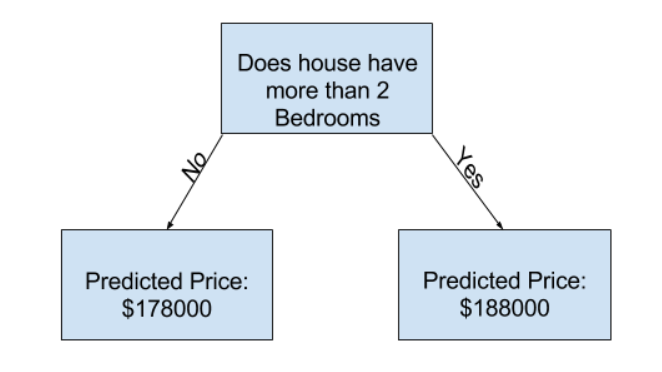

Essentially what he has used is something called a Decision Tree. You can have more branches to the trees and make a very complex looking one too.

After some more questioning you found that this is what essentially your cousin does.

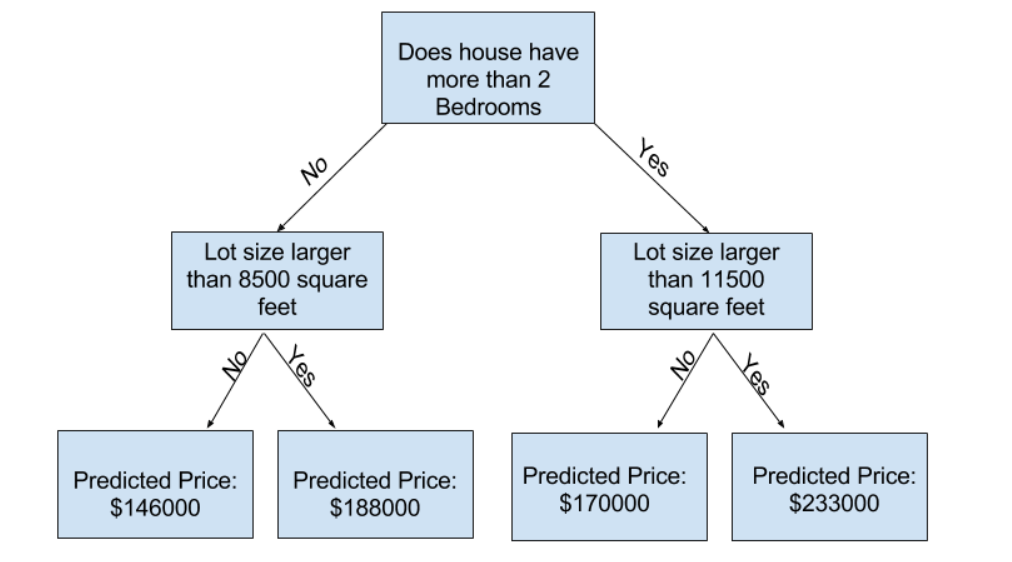

In general a decision tree asks a question and then classifies the data based on that question.

## Training a Decision Tree

In the example that we used above, where your Cousin predicted the price of the house he was going to sell, he used the number of bedrooms in the house as the first parameter through which he classified the data. He did this based on his intuition, but how will a computer know which is the first parameter that will make the best split?

To tackle this problem we have something called the Gini Index that is a kind of loss function which helps us decide the parameters to use to split the data.

Consider a new problem. Let us assume for now that the best split is made by the 'Blocked Arteries' parameter. We then Compare how it affects the target value. We check how related having a Blocked Artery or not, is to having a heart disease. We then get some kind of picture as shown below.

This computation has already been done for the whole dataset. So we can see that there are 215 patients who have a heart disease when they have a blocked artery and 227 who dont. The same can be said about the right Leaf.

A node is a point where the data get split into two or more subsets, a leaf does not split further and is used to represent the samples present in that split

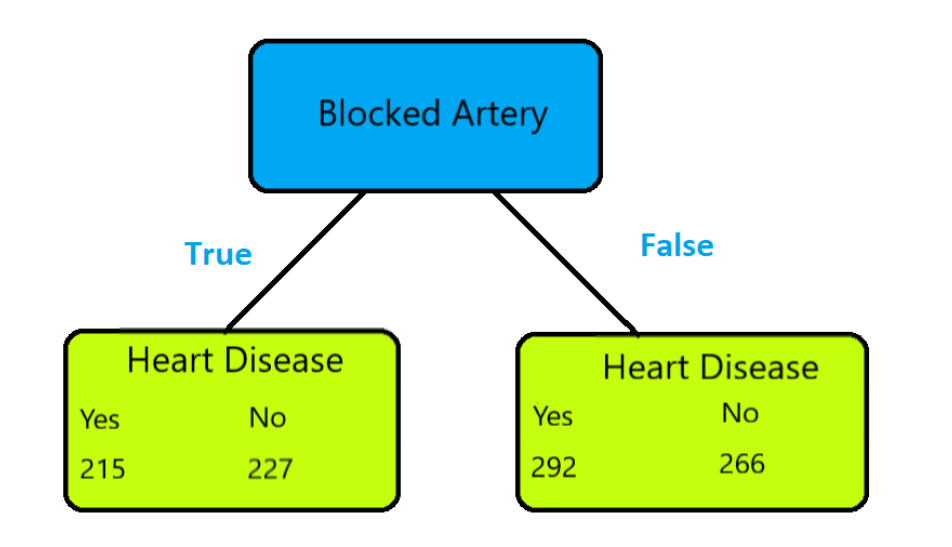

We then need to calculate the Gini index for each 'Leaf' which is denoted in Green. It is calculated as follows:

<center> Gini Index = $ 1 - $ $\mathrm{P}($Yes$)^2 - \mathrm{P}$(No$)^2$ </center>

- For the left leaf the gini index is:
<br> Gini Index = $1 - \left( \frac{215}{215+227} \right)^2 - \left( \frac{227}{215+227} \right)^2 $

- For the right leaf the gini index is:
<br> Gini Index = $1 - \left( \frac{292}{292+266} \right)^2 - \left( \frac{266}{292+266} \right)^2 $


Overall Gini Index is the weighted mean of the Gini Indices for the two nodes, where the weights are the number of samples in each leaf.

Gini index varies between values 0 and 1, where 0 expresses the purity of classification.
- Gini = 0 $\implies$ All the elements belong to a specified class or only one class exists there. 
- Gini = 1 $\implies$ indicates the random distribution of elements across various classes. 
- Gini = 0.5 $\implies$ equal distribution of elements over some classes.

<br><br> Suppose the next parameter is Chest Pain for Blocked Artery and Blood Circulation for Healthy Artery, Below is what our decision tree looks like so far.

To avoid Complexity let's leave it at this stage. Ideally, you could go deeper into the data by creating more splits which will lead to better results.

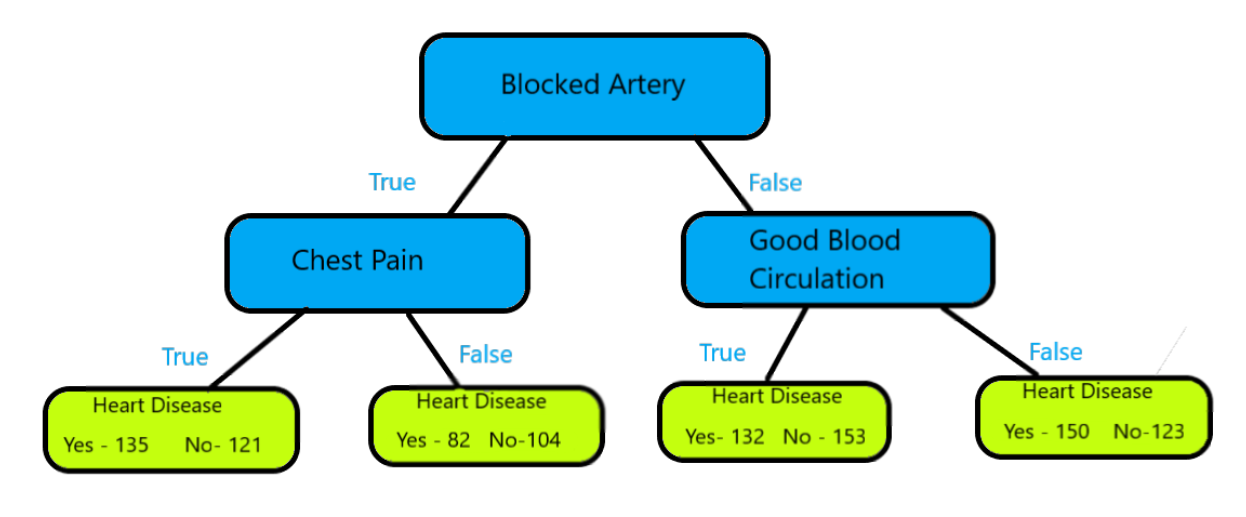

## Making Predictions
Now that we have the structure of the decision tree ready, we have to assign either a yes or no value to each 'Leaf' of the tree, since this is a classification problem.

For the first leaf, the majority of the entries are True so we can change that Leaf to the a True value. The second Leaf will become False, Third will be False and last will be True by the same logic.

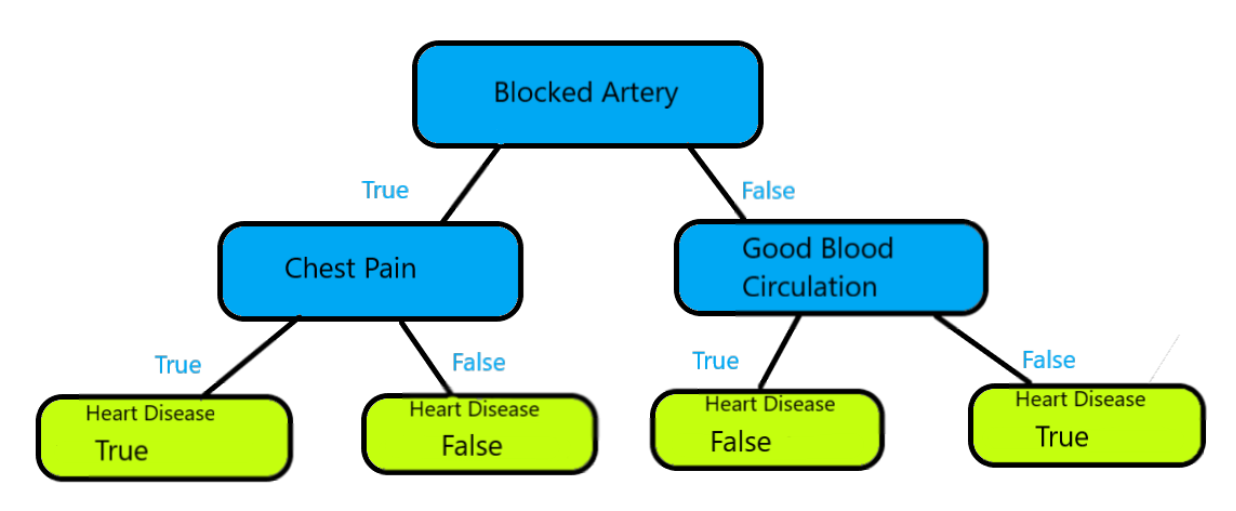

---

## Code

In [12]:
DTModel = DecisionTreeClassifier()

DTModel.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [13]:
DTpredicted = DTModel.predict(Xtest).astype(np.int)

print(f'Accuracy: {accuracy_score(DTpredicted, Ytest)}')

Accuracy: 0.9615384615384616


In [14]:
Ypred = {'Species': LE.inverse_transform(DTpredicted)}
Ypred = pd.DataFrame(Ypred)

predicted = pd.concat([Xtest.reset_index(), Ypred], axis=1)

predicted.head()

,index,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),FEMALE,MALE,Biscoe,Dream,Species
0,341,50.4,15.7,222.0,5750.0,0,1,1,0,Gentoo penguin (Pygoscelis papua)
1,60,35.7,16.9,185.0,3150.0,1,0,1,0,Adelie Penguin (Pygoscelis adeliae)
2,321,55.9,17.0,228.0,5600.0,0,1,1,0,Gentoo penguin (Pygoscelis papua)
3,201,49.8,17.3,198.0,3675.0,1,0,0,1,Chinstrap penguin (Pygoscelis antarctica)
4,298,45.2,13.8,215.0,4750.0,1,0,1,0,Gentoo penguin (Pygoscelis papua)


---